# Get Start scikit-learn

## Installing scikit-learn

with `pip`:
```bash
pip install -U scikit-learn
```

with `conda`:
```bach
$ conda create -n sklearn-env -c conda-forge scikit-learn
$ conda activate sklearn-env
```

**Training set and testing set**

Machine learning involves uncovering patterns and relationships within data. These patterns are then used to make predictions about new, unseen data. A core practice is splitting the data into two sets for training and testing. The **training set** is used to "teach" the model by identifying patterns. The **testing set** then challenges the model with new data to see how well it can apply what it learned. This separation helps ensure the model isn't just memorizing the training data, but can truly generalize to unseen examples.

![train_test](./pictures/train_test.png)

## Model Fitting

 **What Does `.fit()` Do?**
- The `.fit()` method trains a machine learning model on a given dataset.
    
- Specifically, it takes in:

    - A **feature matrix** (usually represented as a 2D array or matrix) containing input data points.

    - A corresponding **target vector** (or label vector) representing the output values associated with each data point.
        
- The goal is to adjust the model's parameters (such as coefficients or weights) to best fit the training data.

**Note**
- When building a machine learning model, we follow these steps:

    1. **Initialization**: Create an instance of a specific model (e.g., `LinearRegression`, `RandomForestRegressor`, etc.).

    2. **Training Data**: Feed the training data (features and corresponding labels) into the model.
    
    3. **Model Learning**: The `.fit()` method uses the training data to adjust the model's internal parameters.

    4. **Model Ready**: Once trained, the model can be used for various tasks, such as making predictions.


**Remember**:

- **Underfitting**: Too simple model; poor performance.

- **Overfitting**: Too complex model; fails to generalize.

- **Bias-Variance Tradeoff**: Balance between simplicity and flexibility.

**note that:** fitting is equal to training. Then, after it is trained, the model can be used to make predictions, usually with a .`predict()` method call.

**To elaborate:** Fitting your model to (i.e. using the `.fit()` method on) the training data is essentially the training part of the modeling process. It finds the coefficients for the equation specified via the algorithm being used (take for example umutto's linear regression example, above).

![fitting](./pictures/fitting.webp)

## Cross-Validation: Evaluating Model Performance

In machine learning, we face a critical challenge: **how well does our model generalize to unseen data?** We can't simply fit the model on the training data and assume it will perform accurately on real-world data. To address this, we use **cross-validation** techniques.

### What is Cross-Validation?

- **Cross-validation** is a technique used to **evaluate the performance of a model on unseen data**.
- Here's how it works:
    1. **Data Splitting**: We divide the available data into multiple **folds** or subsets.
    2. **Training and Validation**: We train the model on some folds (training set) and validate it on the remaining fold (validation set).
    3. **Repeat and Average**: We repeat this process multiple times, each time using a different fold as the validation set.
    4. **Robust Estimate**: Finally, we average the results from each validation step to get a more robust estimate of the model's performance.


In [71]:
import numpy as np 
import sklearn.datasets

In [72]:
data = sklearn.datasets.load_wine()
print(data.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

In [73]:
feature = data.feature_names
X = data.data
y = data.target

## Learning & Prediction

In [74]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X[:-5], y[:-5]) # .fit() is train data (So here train in X[:-5] datas)
reg.score(X[:-5], y[:-5])

reg.coef_ # Get the model coefficients (weights for each feature)
          # These represent the magnitude and direction of the linear relationship between features and target

reg.intercept_  # Get the model intercept (the y-axis value where the fitted line crosses)


rand_choice = np.random.choice(X.shape[0], size=5, replace=True)
reg.predict(X[rand_choice])  # Make predictions on the selected data points (using the trained model)

array([0.9279392 , 2.03705136, 0.02565819, 2.22722888, 0.76727556])

In [75]:
print(f"coefficent: {reg.coef_}", end='\n\n')

print(f"intercept: {reg.intercept_}")


coefficent: [-0.11430629  0.02814656 -0.14248095  0.04000511 -0.00059665  0.1464011
 -0.37175129 -0.31360262  0.03955611  0.07513326 -0.14781083 -0.27135876
 -0.00071033]

intercept: 3.443632994085607


In [76]:
print(f"real target: {y[rand_choice]}")
print(f"pred target: {reg.predict(X[rand_choice])}")


real target: [1 2 0 2 1]
pred target: [0.9279392  2.03705136 0.02565819 2.22722888 0.76727556]


In [77]:
print(f"last 5 target: {y[-5:]}")
print(f"predict last 5 data: {reg.predict(X[-5:])}")

last 5 target: [2 2 2 2 2]
predict last 5 data: [1.83402316 1.92245597 2.01127544 1.85602672 2.14080926]


In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

<Axes: >

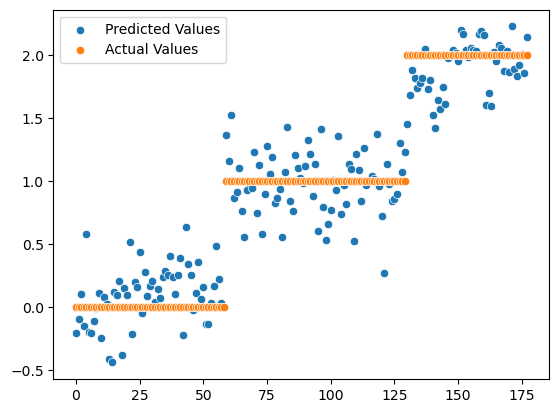

In [79]:
sns.scatterplot(x=np.arange(178), y=reg.predict(X), label="Predicted Values")  # Plot predictions
sns.scatterplot(x=np.arange(178), y=y, label="Actual Values")   

<Axes: >

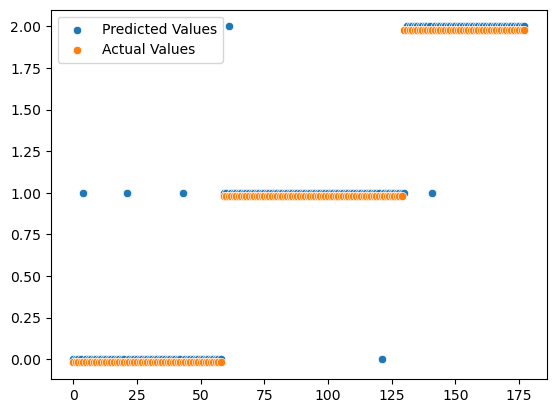

In [80]:
sns.scatterplot(x=np.arange(178), y=np.round(reg.predict(X)), label="Predicted Values")  # Plot predictions
sns.scatterplot(x=np.arange(178), y=y-0.02, label="Actual Values") # Because the data can be found 